In [2]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [30]:
Stock = 'MSFT' 
data = pd.DataFrame()
data[Stock] = wb.DataReader(Stock, data_source='yahoo', start='2005-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [31]:
log_returns.tail()

,MSFT
Date,
2021-03-01,0.019433
2021-03-02,-0.013042
2021-03-03,-0.027351
2021-03-04,-0.003654
2021-03-05,0.021252


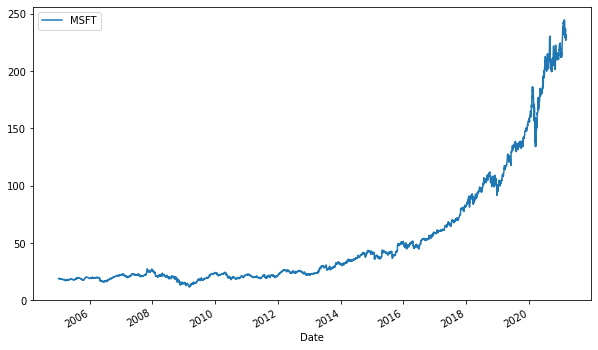

In [5]:
data.plot(figsize=(10, 6));

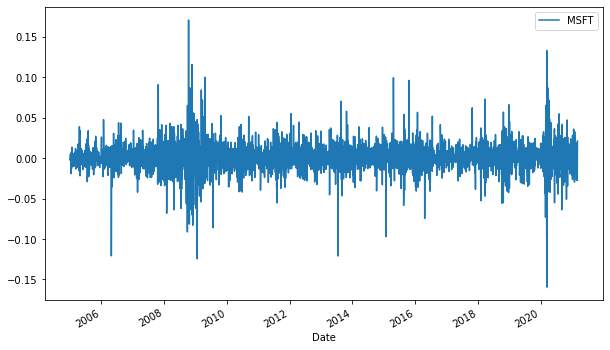

In [6]:
log_returns.plot(figsize = (10, 6))

In [7]:
u = log_returns.mean()
u

MSFT    0.000612
dtype: float64

In [8]:
var = log_returns.var()
var

MSFT    0.000296
dtype: float64

$$
drift = u - \frac{1}{2} \cdot var
$$

In [9]:
drift = u - (0.5 * var)
drift

MSFT    0.000464
dtype: float64

In [10]:
stdev = log_returns.std()
stdev

MSFT    0.017217
dtype: float64

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
np.array(drift)

array([0.0004642])

In [14]:
drift.values

array([0.0004642])

In [15]:
stdev.values

array([0.01721748])

In [17]:
x = np.random.rand(10, 2)
x

array([[0.96129076, 0.41609531],
       [0.2117196 , 0.30243961],
       [0.09731144, 0.97945722],
       [0.70641517, 0.47189661],
       [0.33939214, 0.85723944],
       [0.17689209, 0.44512696],
       [0.07204254, 0.59925006],
       [0.70493038, 0.98641417],
       [0.63369877, 0.14056351],
       [0.15388543, 0.05692083]])

In [19]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.82164334, -0.37925855],
       [ 0.39018917,  0.3390433 ],
       [ 2.80747443,  1.53561792],
       [-0.75916512,  0.08726159],
       [ 1.0962844 ,  0.39956736],
       [-2.08737805,  0.04831059],
       [ 0.49150912,  0.04454583],
       [ 0.33672328, -0.25393266],
       [-1.71614151,  0.34100986],
       [ 2.03236035, -0.71485948]])

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [20]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [21]:
daily_returns

array([[1.01113049, 0.988454  , 1.00603543, ..., 0.98193428, 0.96779563,
        0.96368315],
       [1.02579371, 0.9848991 , 1.04310873, ..., 1.03181254, 1.01000722,
        1.0002727 ],
       [1.05013548, 1.01310345, 1.00523789, ..., 1.00990981, 1.01684003,
        0.98744016],
       ...,
       [0.98755111, 1.04867417, 1.02309964, ..., 1.0115677 , 0.99300154,
        1.05115718],
       [1.01205832, 0.97154433, 0.97109905, ..., 1.00922844, 1.01320348,
        0.98905882],
       [0.99881826, 0.99764687, 0.98266078, ..., 1.02018696, 0.9864265 ,
        1.00514575]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [22]:
S0 = data.iloc[-1]
S0

MSFT    231.600006
Name: 2021-03-05 00:00:00, dtype: float64

In [23]:
price_list = np.zeros_like(daily_returns)

In [24]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
price_list[0] = S0
price_list

array([[231.6000061, 231.6000061, 231.6000061, ..., 231.6000061,
        231.6000061, 231.6000061],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [27]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [28]:
price_list

array([[ 231.6000061 ,  231.6000061 ,  231.6000061 , ...,  231.6000061 ,
         231.6000061 ,  231.6000061 ],
       [ 237.5738298 ,  228.10263738,  241.58398809, ...,  238.96779085,
         233.91767773,  231.6631633 ],
       [ 249.48470693,  231.09156993,  242.84937869, ...,  241.3359156 ,
         237.85685833,  228.75351077],
       ...,
       [ 403.72269932, 1044.12898732,  862.03025283, ...,  414.35405677,
         438.75516217,  205.96060692],
       [ 408.59091677, 1014.4175977 ,  837.1167634 , ...,  418.17789816,
         444.54825679,  203.70715527],
       [ 408.10806667, 1012.03053868,  822.60181108, ...,  426.61964039,
         438.51418126,  204.75538103]])

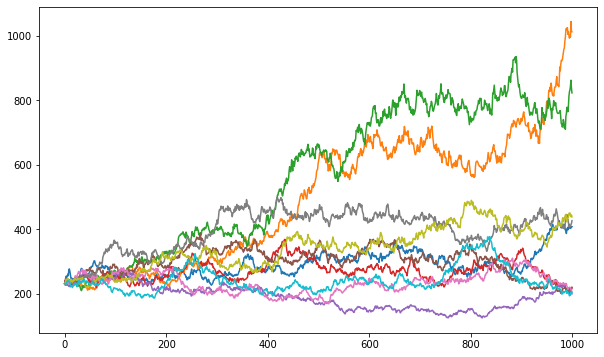

In [29]:
plt.figure(figsize=(10,6))
plt.plot(price_list);